O objetivo deste *notebook* é reproduzir algumas das simulações reportadas por Preacher et al. (2015) para ilustrar alguns pontos acerca da abordagem de grupos extremos (EGA).

**Referência:** Preacher, K. J., Rucker, D. D., MacCallum, R. C., & Nicewander, W. A. (2015). Use of the extreme groups approach: A critical reexamination and new recomnendations. *Psychological Methods*, *10*(2), 178–190. https://doi.org/10.1037/1082-989X.10.2.178

In [10]:
# carregando bibliotecas importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from datetime import datetime

**O que diabos é uma abordagem de grupos extremos (*extreme groups approach*, EGA)?**

Em síntese, em algumas pesquisas, ao invés de amostrar participantes ao longo do contínuo de uma variável de interesse, pesquisadores podem amostrar participantes dos extremos dessa distribuição. Por exemplo, se a variável de interesse fosse altura, uma pesquisadora poderia amostrar indivíduos com menos de 1,50 m e com mais de 1,90 m; se a variável de interesse fosse inteligência, ela poderia amostrar indivíduos menos e mais inteligentes. 

Em geral, grupos extremos são escolhidos com base em um de três critérios (Preacher et al., 2015):
1. **Quantis dependentes de amostra:** por exemplo, com base em 100 pessoas que responderam a uma escala de inteligência, seleciono aquelas que ficaram nos quartis 1 (menos inteligentes) e 4 (mais inteligentes) dessa medida. Note que os "menos" e "mais" inteligentes variarão de amostra para amostra, pois eles são dependentes da distribuição obtida naquela amostra em específico. Além disso, isso garante quantidades similares de participantes em cada grupo;
2. **Pontos de corte derivados de normas populacionais:** por exemplo, com base nas respostas de participantes a uma escala de inteligência, seleciono aquelas com QI < 80 e aquelas com QI > 120. Note que esses valores são independentes da minha amostra, pois são baseados em estimativas populacionais;
3. **A natureza inerente da própria escala:** por exemplo, com base em uma escala de 4 itens de satisfação com a empresa, posso amostrar indivíduos que marcaram 1 (*Muito insatisfeito*) em todos os itens e indivíduos que marcaram 5 (*Muito satisfeito*) em todos os itens. 

O ponto importante aqui é que, em geral, a variável usada para amostrar indivíduos em seus extremos é tratada de forma dicotômica (e.g., jovens vs. idosos, baixa satisfação vs. alta satisfação, pouca habilidade vs. muita habilidade).

A figura a seguir ilustra a ideia da abordagem de grupos extremos.

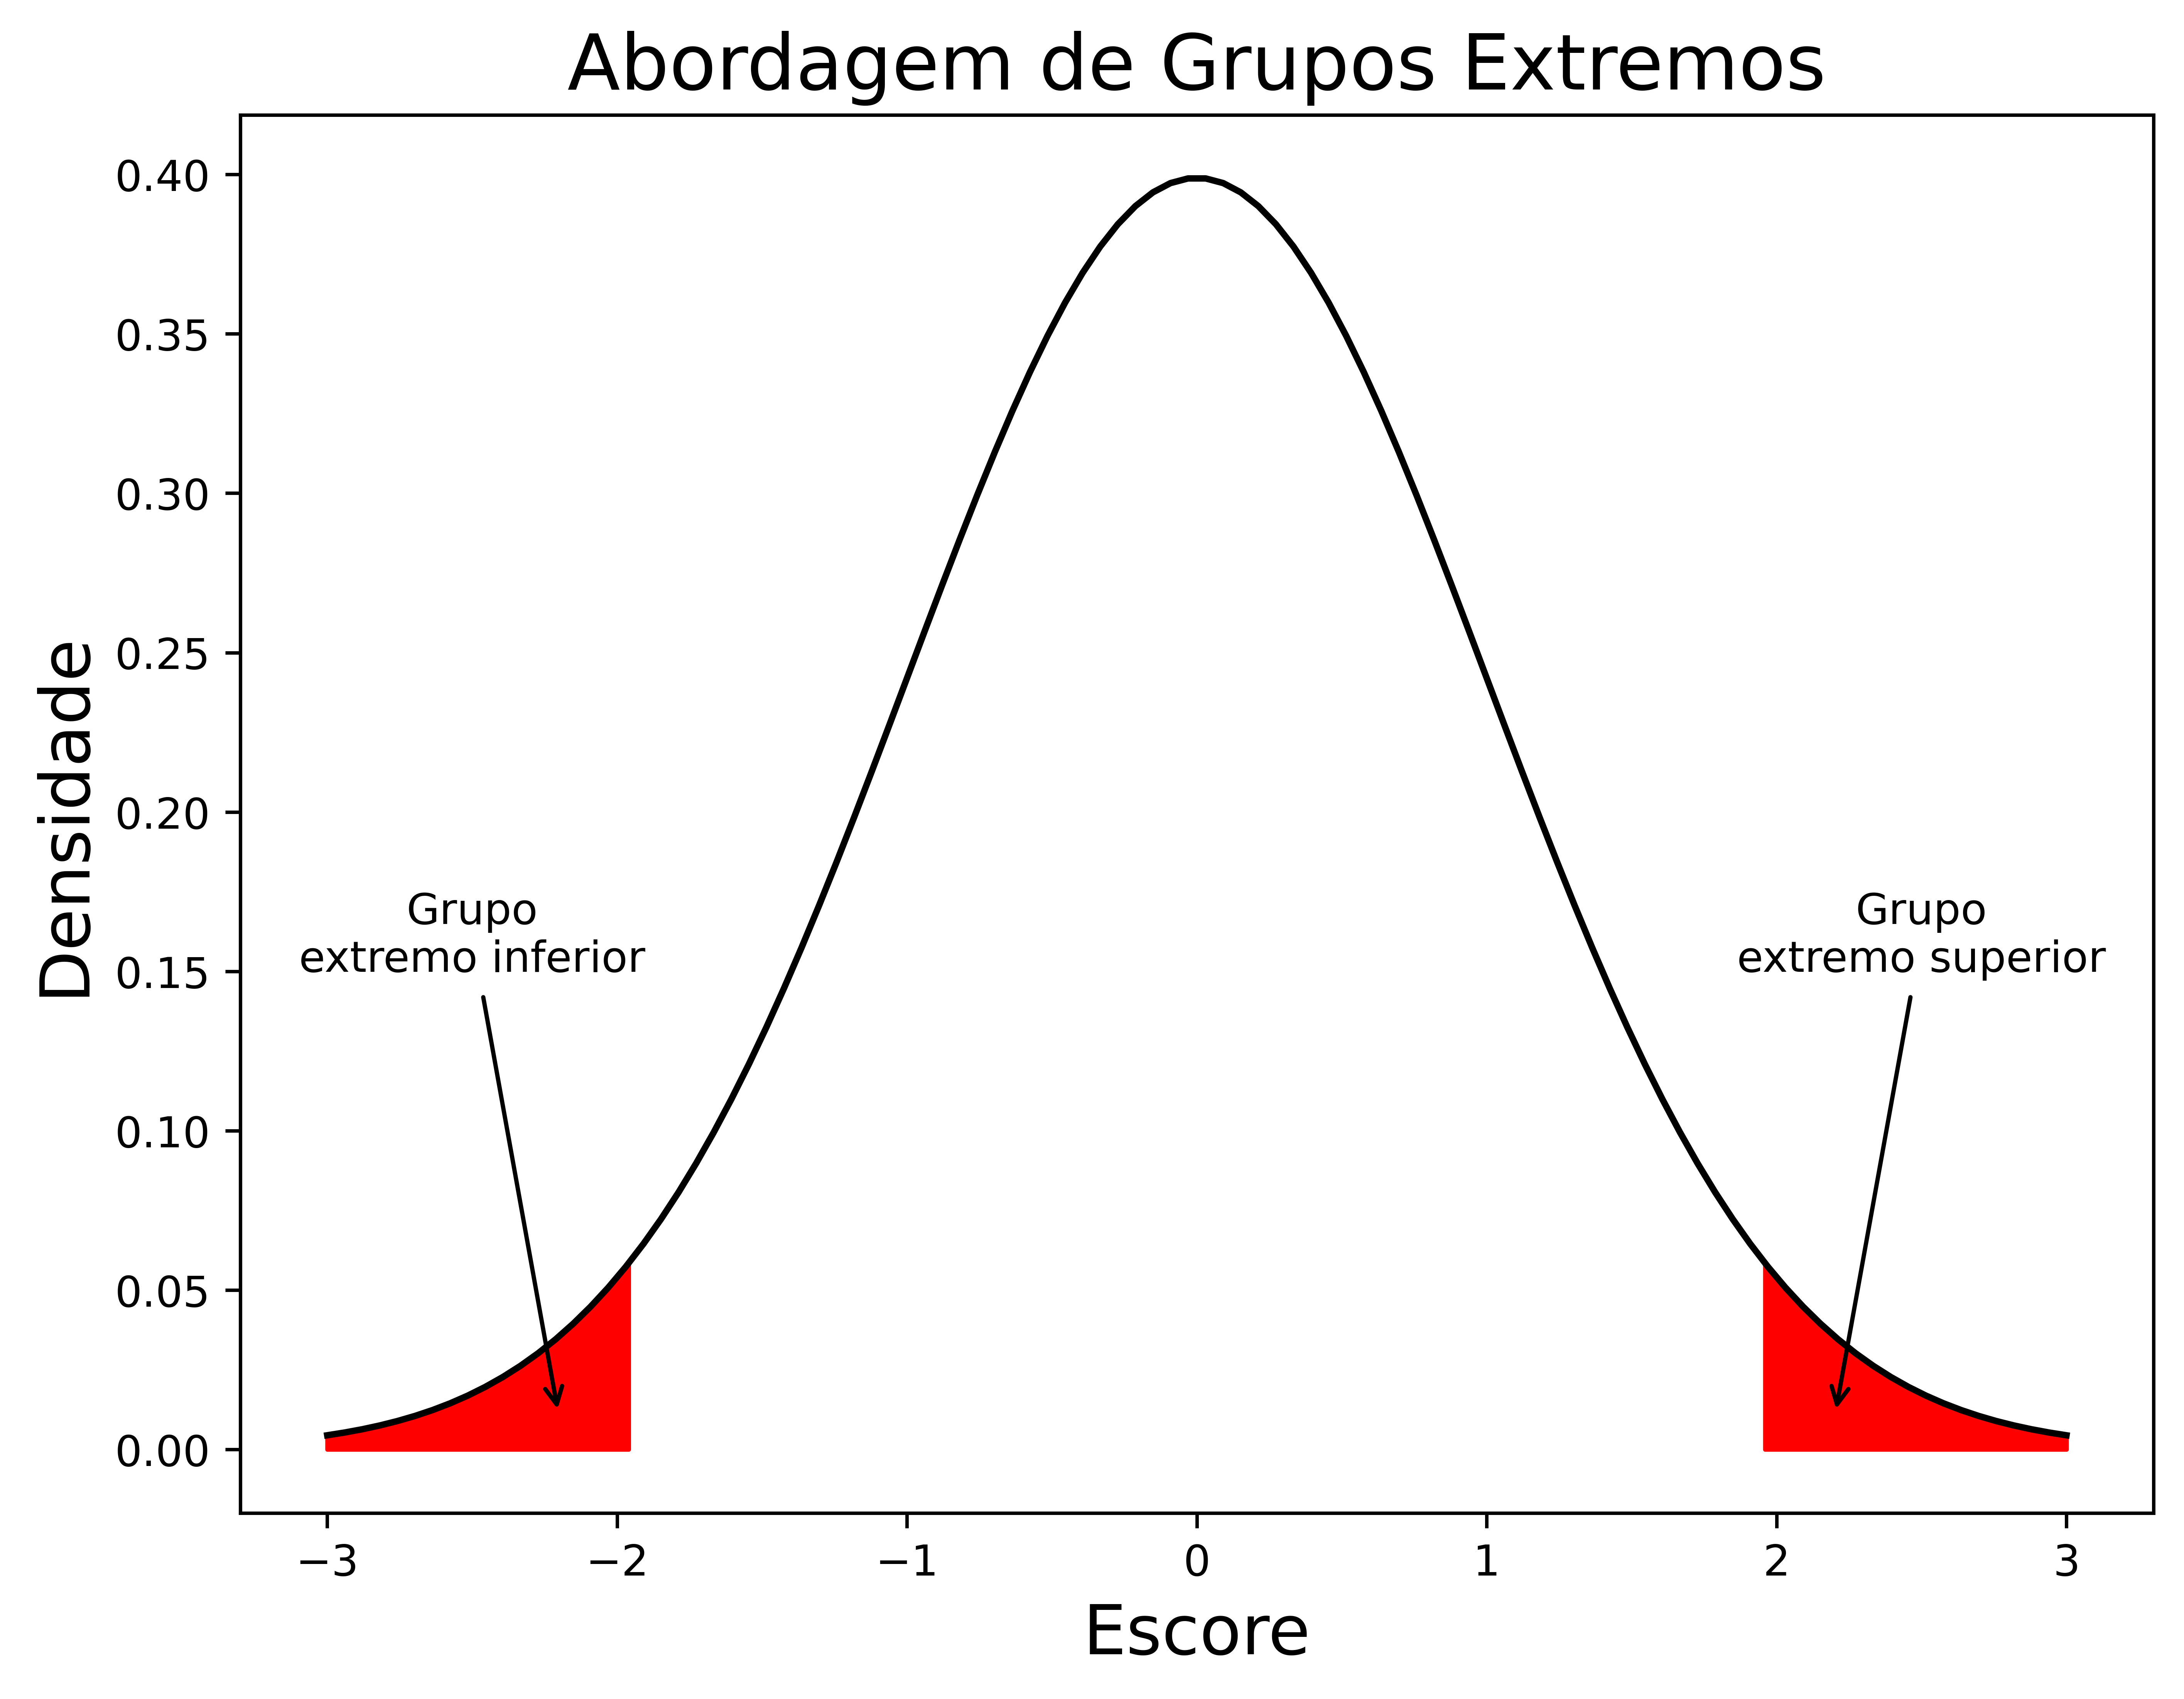

In [30]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 800)

# Valores dos parâmetros
mu, sigma = 0, 1

# Valores do eixo x
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

# Valores do eixo x em cada região extrema
lower = np.linspace(x[0], -1.96, 100)
upper = np.linspace(1.96, x[-1], 100)

# Plotando o gráfico
# stats.norm.pdf: retorna a função densidade de probabilidade da distribuição normal
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'black') 

# Região a ser preenchida
plt.fill_between(lower, stats.norm.pdf(lower, mu, sigma), color = 'red')
plt.fill_between(upper, stats.norm.pdf(upper, mu, sigma), color = 'red')

# Anotações
plt.annotate("Grupo\nextremo inferior",
            xy = (-2.2, 0.01), xytext = (-2.5, 0.15),
             horizontalalignment = "center",
             arrowprops = dict(arrowstyle = "->", lw = 1))

plt.annotate("Grupo\nextremo superior",
            xy = (2.2, 0.01), xytext = (2.5, 0.15),
             horizontalalignment = "center",
             arrowprops = dict(arrowstyle = "->", lw = 1))

# Rótulos dos eixos
plt.xlabel("Escore", fontsize = 16)
plt.ylabel("Densidade", fontsize = 16)

# Título do gráfico
plt.title("Abordagem de Grupos Extremos", fontsize = 18)

# Salvando o gráfico
plt.savefig('012.1 - Abordagem de grupos extremos (EGA), representação.jpg', dpi = 600, bbox_inches = "tight")

# Mostrando o gráfico
plt.show()

**Aspectos importantes da abordagem de grupos extremos (EGA)**

(*Os itens 2, 3 e 8 serão a seguir replicados. O item 4, por limitações atuais do presente autor do notebook, não foi replicado.*)

1. **Custo eficiência:** dado um *N* fixo, EGA reduz o tamanho amostral necessário para observar um efeito sem comprometer o poder estatístico (desde que *X* e *Y* já não tenham sido coletados, o que é conhecido como *subagrupamento post hoc*);
2. **Poder estatístico:** o poder aumenta com o tamanho amostral, com a correlação populacional entre *X* e *Y* e, para um dado tamanho amostral, com a extremidade da divisão da variável *X*. Contudo, recomendações modernas de metodólogos é de que o objetivo da pesquisa não é obter *p*s estatisticamente significativos, mas sim determinar o que os dados nos informam sobre o fenômeno de interesse, isto é, sobre o tamanho de efeito e sua significância *prática*;
3. **Tamanhos de efeito:** quando grupos extremos são analisados, os tamanhos de efeito padronizados (e.g., *d*s de Cohen, *r*s de Pearson) tendem a ser "dramaticamente inflacionados," o que, por sua vez, está associado com o maior poder estatístico descrito em (2). Contudo, a EGA deve ser usada somente para decidir *sobre a presença de um efeito linear na população, jamais sobre sua magnitude*. Em uma simulação (que replico mais adiante), Preacher et al. (2015) mostram que o ganho no tamanho de efeito padronizado pode ser bastante grande, especialmente para valores modestos de rho(x, y). Contudo, é inapropriado interpretar medidas de tamanho de efeito padronizado como descritivas de efeitos populacionais, quando derivadas de EGAs (para recomendações similares, ver Conway et al., 2005; xxx);
4. **Fidedignidade:** a EGA geralmente resulta na omissão dos escores mais fidedignos (que são os escores centrais que, segundo a TRI, são aqueles que são mais informativos dos traços latentes dos participantes). Na TCT, a fidedignidade é definida como a razão da variância verdadeira sobre a variânicia observada (i.e., verdadeira + erro). Ao deletar os casos no meio da distribuição, a EGA acaba por aumentar a variância verdadeira, deixando a variância de erro intacta; no entanto, esse aumento na fidedignidade é um artefato da deleção dos casos do meio, não pela eliminação dos escores menos confiáveis; em outras palavras, dizer que a EGA aumenta a fidedignidade é lenda. A TCT não é informativa desse tipo de cenário; quando apropriadamente analisado sob o *framework* da TRI, Preacher et al. (2015) mostram que os escores na EGA são *menos* fidedignos;
5. **Especificação errônea do modelo:** a EGA aumenta as chances de especificação incorreta do modelo (e.g., se existir não linearidade na região não amostrada, o que faz com que a EGA force a linearidade). Assim, a EGA deve ser usada apenas quando o pressuposto de linearidade da relação entre *X* e *Y* for plausível;
6. **Designação aos grupos:** designar grupos a categorias como "baixa capacidade de memória de trabalho" e "alta capacidade de memória de trabalho", dentre outros, só é factível de existirem esses táxons subjacentes e, além disso, se os escores observados refletirem corretamente o pertencimento dos indivíduos como membros desses táxons. Um problema da EGA é que ela comumente adotada a criação de grupos por quartis ou tercis, o que pressupõe a homogeneidade dos tamanhos dos táxons na população, o que pode ser não factível (e.g., em psicopatologias). Se, por exemplo, o pertencimento aos táxons na população for da ordem de 25% e 75%, uma divisão por tercis incluirá aproximadamente 8,3% de pessoas do táxon maior incorretamente no táxon menor!
7. **Efeitos de interação:** grupos quasi-arbitrários também podem constituir um tipo de especificação errônea do modelo (5). A criação de tais grupos para testar interações geralmente é inadequada; interações são sempre mais bem abordadas por meio de técnicas baseadas em regressão, envolvendo um termo que é o produto de seus termos constituintes;
8. **Regressão à média:** o uso de EGA auemnta as chances disso acontecer. O presuposto é que os escores extremos na amostra representam os extremos da distribuição de escores verdadeiros na população. Contudo, aqueles casos selecionados nos extremos em uma instância (e.g., mensuradas em *X* hoje) poderiam muito bem não ser os mesmos casos extremos (devido ao erro de mensuração) caso eu repetisse a mensuração de *X* amanhã. Implicação: um fenômeno estatisticamente significativo em uma EGA pode ser resultante, ao menos em parte, de um artefato de regressão à média.

**2. Poder estatístico**

Algumas equações apresentadas por Preacher et al. (2015):

<img src="Preacher et al. (2015), fórmulas.jpg">

A **Equação 1** representa um parâmetro de poder (ou de não centralidade) de teste *t* para correlações de Pearson. A **Equação 2** apresenta essa mesma fórmula, mas agora aplicada para o caso em que ocorre EGA (para detalhes, ver Preacher et al., 2015). A **Equação 3** indica como calcular a quantidade *h*, usada na **Equação 2**. Mais importante, a **Equação 4** indica como calcular a razão entre os parâmetros de não centralidade da **Equação 2** e da **Equação 1**. Seu resultado pode ser pensado como um índice de poder relativo na EGA e no cenário sem EGA: quando essa razão for igual a 1, quer dizer que o poder é similar nos dois tipos de delineamento; quanto mais distante (e acima) de 1 for essa razão, maior será o poder relativo da EGA em relação a um delineamento que amostra participantes ao longo de todo o contínuo de *X*.

In [31]:
# Implementando funções que calculam as equações 1 a 4

# Equação 1
def phi_r(rho = 1, p = 1, N = 100):
    '''
    Calcula e retorna um parâmetro de não centralidade para testes t de correlação
    (ver Preacher et al., 2015, Equação 1).
    Valores default são apenas ilustrativos para algoritmo não quebrar.
    
    rho: correlação populacional usando dados completos
    N: tamanho amostral da amostra selecionada ao longo de todo o contínuo da variável X
    p: proporção retida em cada uma das caudas da distribuição (valor máximo = 0.50)
    '''
    return (rho * math.sqrt(pN)) / math.sqrt(1 - rho ** 2)

# Equação 2
def phi_r_prime(rho = 1, p = 1, N = 100, x = 0):
    '''
    Chama a função compute_h, retorna h e, em seguida,
    calcula e retorna um parâmetro de não centralidade para testes t de correlação
    para o caso em que foram usados grupos extremos (ver Preacher et al., 2015, Equação 2).
    Valores default são apenas ilustrativos para algoritmo não quebrar.
    
    rho: correlação populacional usando dados completos
    N: tamanho amostral da amostra selecionada ao longo de todo o contínuo da variável X
    p: proporção retida em cada uma das caudas da distribuição (valor máximo = 0.50)
    x = escore z cortando os participantes top pN (sem EGA, x = 0 e Eq. 2 = Eq. 1)
    h = ordenada da distribuição normal padrão em x
    '''
    h = compute_h(x)
    # abaixo, o termo (x * h) / p nunca é negativo e aumenta com a extremidade da seleção dos grupos
    # portanto, phi_r_prime será maior que phi_r para desenho de grupos extremos (i.e., maior poder)
    return (rho * math.sqrt((1 + (x * h) / p) * pN)) / math.sqrt(1 - rho ** 2)

# Equação 3
def compute_h(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-(x ** 2 / 2))

# Equação 4
def phi_ratio(p = 1, z = 0):
    '''
    Chama a função compute_h, retorna h e, em seguida,
    calcula e retorna a razão entre phi_r_prime e phi_r (ver Preacher et al., 2015, Equação 4).
    '''
    h = compute_h(z)
    return math.sqrt(1 + (h * z) / p)    

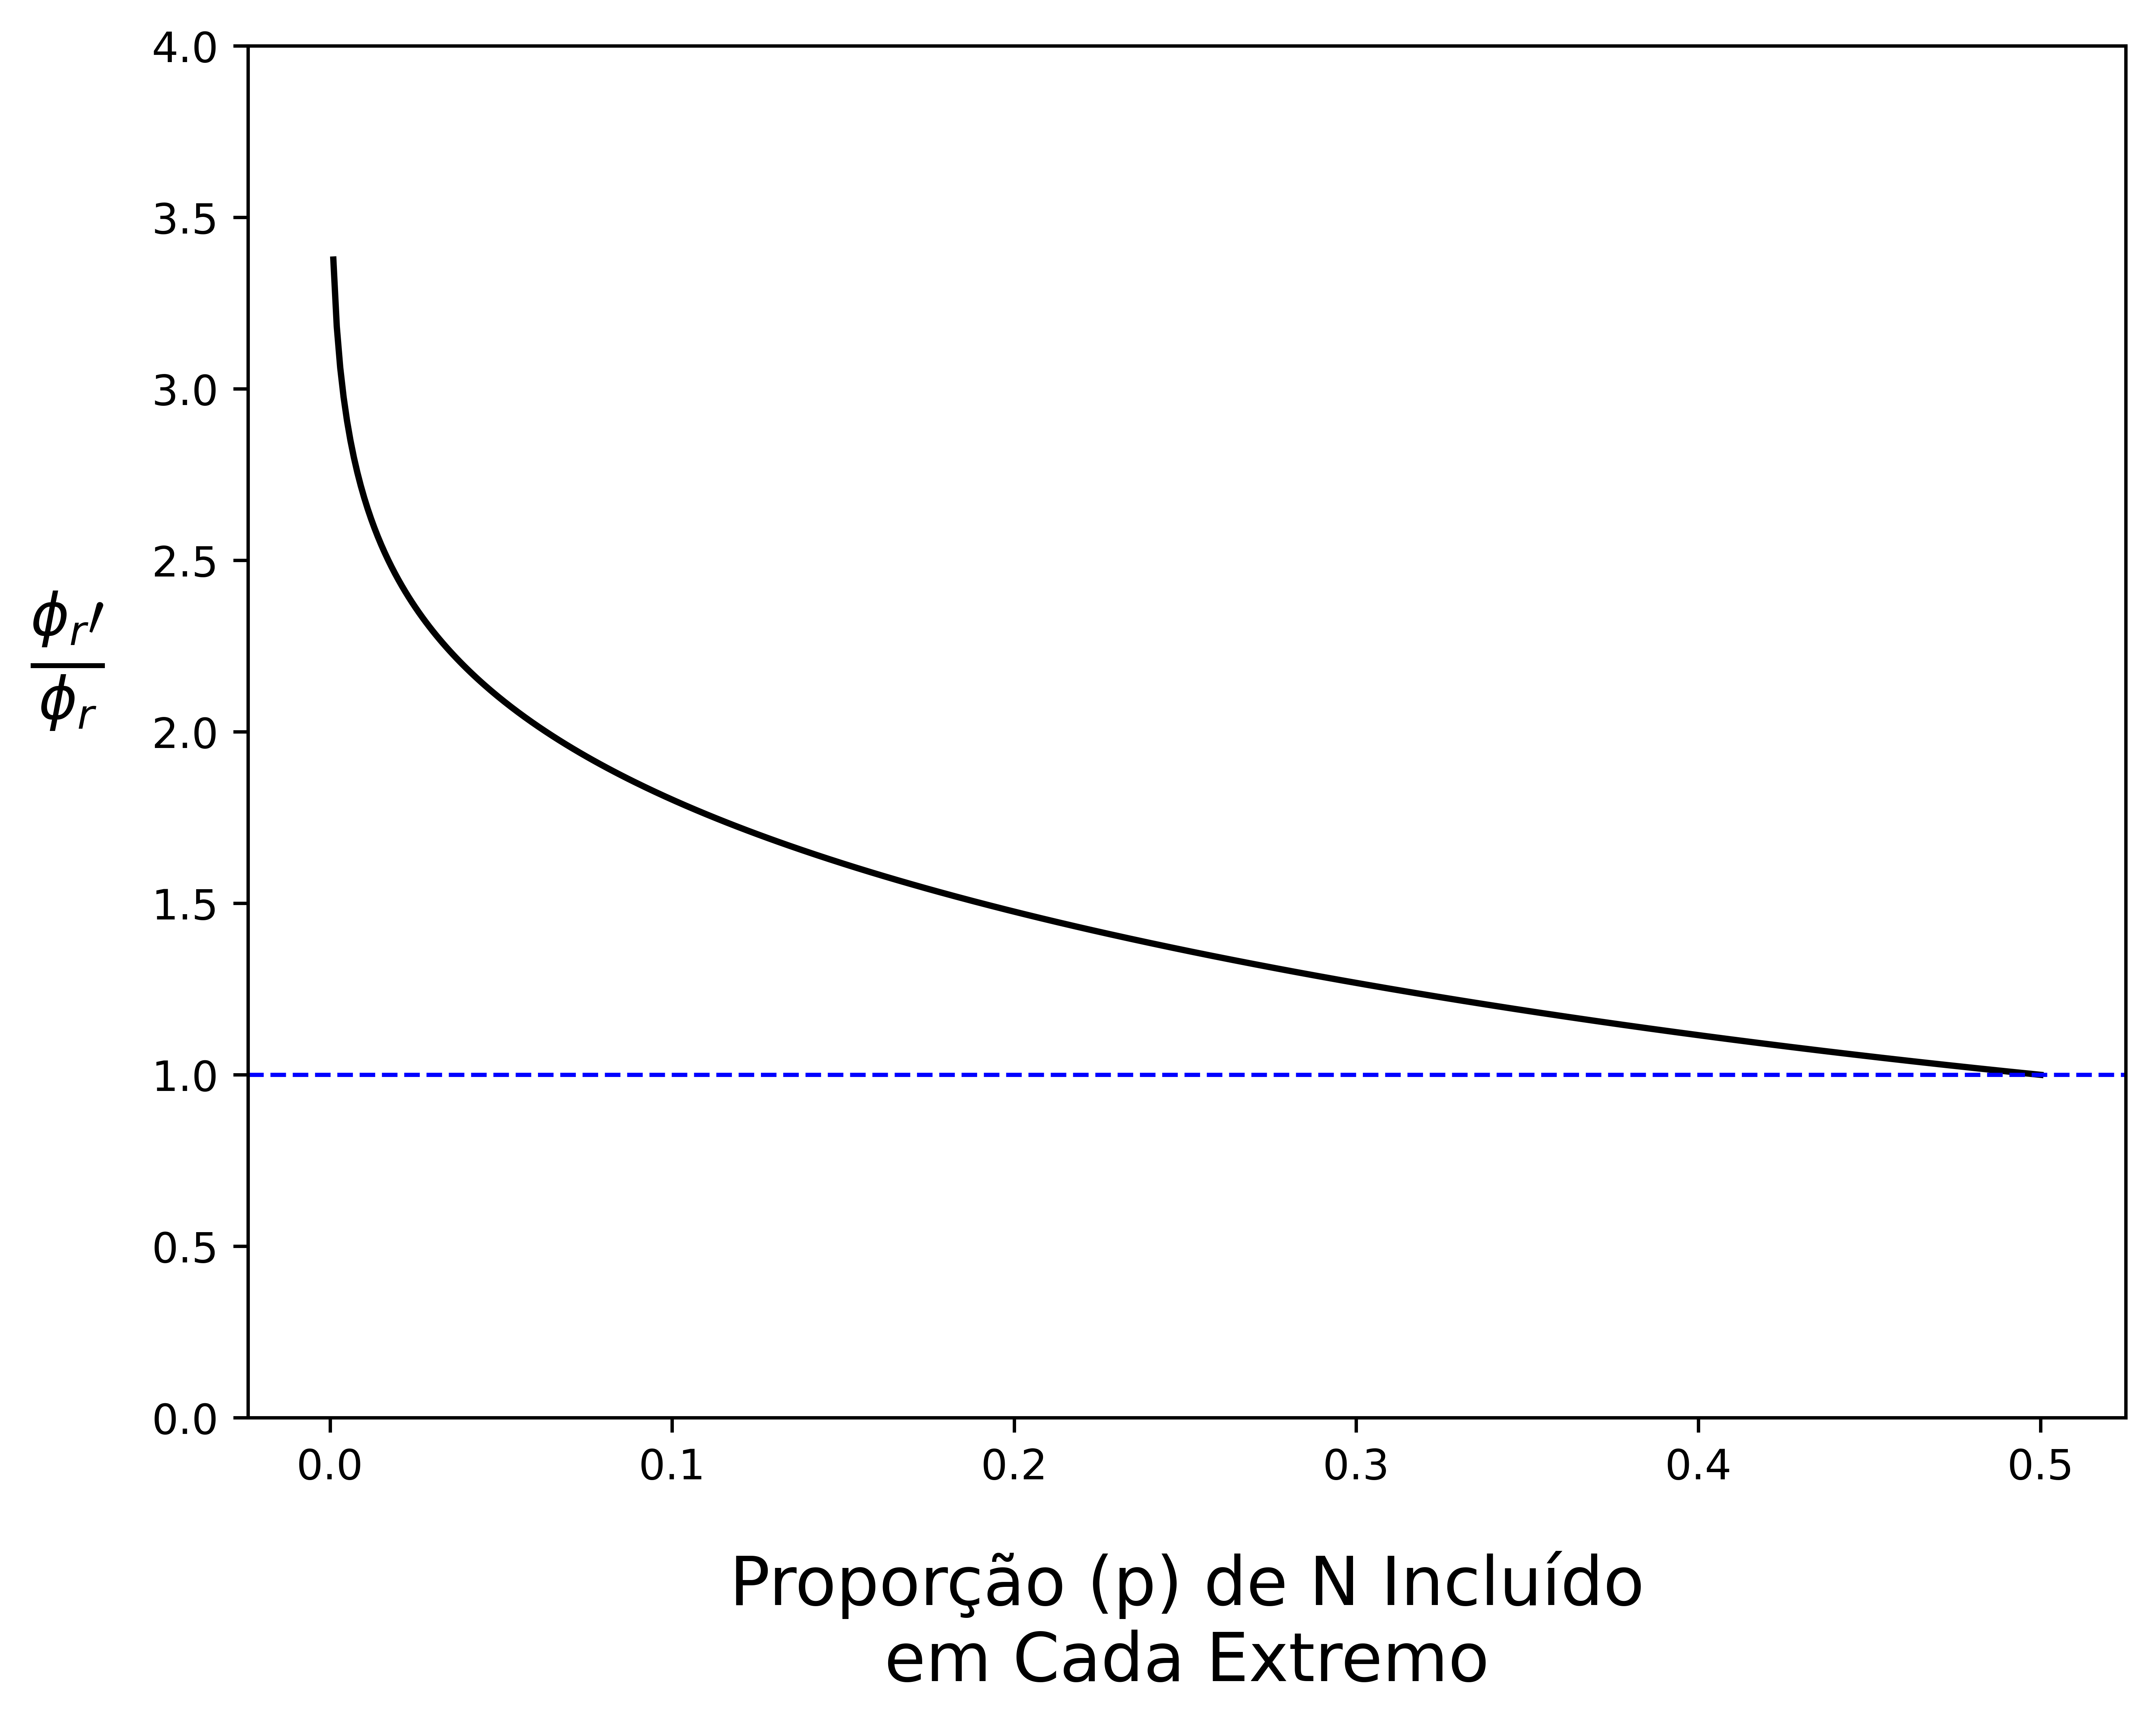

In [32]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 800)

ps = np.linspace(0.001, 0.500, 500)
zs = list()
phi_ratios = list()
sample_size = 100

for p in ps:
    # calculando tamanho amostral para manter tamanho amostral constante em 100
    N = (sample_size / 2) / p
    z = stats.norm.ppf(1 - p)
    zs.append(z)
    phi_ratios.append(phi_ratio(p = p, z = z))
    
    
plt.plot(ps, phi_ratios, color = "black")
plt.axhline(y = 1, linewidth = 1, color = "blue", ls = "--")
plt.ylim(0, 4)
plt.xlabel("Proporção (p) de N Incluído\nem Cada Extremo", fontsize = 16, labelpad = 15)
plt.ylabel(r"$\frac{\phi_r\prime}{\phi_r}$", fontsize = 20, rotation = 0, labelpad = 20)

plt.savefig('012.2 - Razão entre parâmetros de não centralidade com e sem EGA.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

Replicando Preacher et al. (2015; ver Figura 1 deles), esse resultado mostra que o poder relativo da EGA aumenta quanto mais extremo é o corte da EGA (i.e., quanto mais a amostragem ocorre em fatias menores dos extremos da distribuição em *X*). O cenário p = 0,50 representa o caso em que EGA = delineamento tradicional. O poder em EGA *jamais* é inferior ao do delineamento tradicional.

A seguir, replicaremos uma simulação feita pelos autores.

Amostraremos dados de populações em que *X* e *Y* têm diferentes níveis de correlação (0,10, 0,30 e 0,50), com diferentes tamanhos amostrais N = (24, 60, 120, 240, 360, 480) e com diferentes proporções centrais omitidas (0, 0,33, 0,50). Note que 0 representa um delineamento tradicional, 0,33 representa uma EGA com divisão por tercis e 0,50 uma EGA com divisão por quartis.

Essa simulação produziu um delineamento fatorial 3 × 6 × 3. Os resultados a seguir replicam a Figura 2 de Preacher et al. (2015).

In [33]:
import time

rhos = [0.1, 0.3, 0.5]
Ns = [24, 60, 120, 240, 360, 480]
ps_omitted = [0, 0.33, 0.50] # dados completos, divisão por tercis extremos e por quartis extremos
samples = 10_000
powers = list()

for rho in rhos:
    
    for p in ps_omitted:
                
        for N in Ns:
            
            # variável a ser incrementada cada vez que o t associado ao r de Pearson for significativo
            empirical_power = 0
            
            for i in range(samples):
                # tamanho amostral e parâmetros da distribuição bivariada da simulação i
                sample_size = round(N * (1 - p) ** 0.5)
                mean = [0, 0]
                cov = [[1, rho],
                       [rho, 1]]
                
                # criando uma população hipotética
                pop = np.random.multivariate_normal(mean, cov, size = 10_000)
                
                # e gerando amostras de tamanho sample_size a depender da proporção eliminada de casos
                if p == 0:
                    sample = pop[0:sample_size]
                elif p == 0.33: # z = |0.4399| está associado à divisão por tercis
                    sample = pop[(pop.T[0] < -0.4399) | (pop.T[0] > 0.4399)][0:sample_size]
                elif p == 0.50: # z = |0.6745| está associado à divisão por quartis
                    sample = pop[(pop.T[0] < -0.6745) | (pop.T[0] > 0.6745)][0:sample_size]
                
                sample = sample.T
                
                # r de Pearson
                r = np.corrcoef(sample[0], sample[1])[0][1]
                
                # estatística t (ver Preacher et al., 2015, Equação 5)
                t = (r * math.sqrt(N - 2)) / math.sqrt(1 - r ** 2)
                
                # valor p associado
                p_value = stats.t.sf(abs(t), sample_size - 2)
                
                # se p < alfa (0,05), incremente a contagem de poder em uma unidade
                if p_value < 0.05:
                    empirical_power += 1
            
            # guarda o poder empírico observado em uma lista
            powers.append(empirical_power / samples)
            
            # calcula a hora e a rodada da simulação, apenas para orientar o usuário
            # sobre quanto falta para terminar o processo
            # no meu computador, a simulação está levando quase 80 minutos...
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print(f"{current_time} - {rho}, {p}, {N}")        

11:29:28 - 0.1, 0, 24
11:30:19 - 0.1, 0, 60
11:31:07 - 0.1, 0, 120
11:32:02 - 0.1, 0, 240
11:32:57 - 0.1, 0, 360
11:34:21 - 0.1, 0, 480
11:35:42 - 0.1, 0.33, 24
11:37:02 - 0.1, 0.33, 60
11:38:14 - 0.1, 0.33, 120
11:39:21 - 0.1, 0.33, 240
11:40:45 - 0.1, 0.33, 360
11:42:01 - 0.1, 0.33, 480
11:43:17 - 0.1, 0.5, 24
11:44:31 - 0.1, 0.5, 60
11:45:42 - 0.1, 0.5, 120
11:47:30 - 0.1, 0.5, 240
11:48:48 - 0.1, 0.5, 360
11:52:50 - 0.1, 0.5, 480
11:54:07 - 0.3, 0, 24
11:56:31 - 0.3, 0, 60
11:57:56 - 0.3, 0, 120
11:59:28 - 0.3, 0, 240
12:00:51 - 0.3, 0, 360
12:02:14 - 0.3, 0, 480
12:06:55 - 0.3, 0.33, 24
12:08:17 - 0.3, 0.33, 60
12:10:30 - 0.3, 0.33, 120
12:12:41 - 0.3, 0.33, 240
12:13:57 - 0.3, 0.33, 360
12:18:26 - 0.3, 0.33, 480
12:20:55 - 0.3, 0.5, 24
12:22:03 - 0.3, 0.5, 60
12:23:14 - 0.3, 0.5, 120
12:24:26 - 0.3, 0.5, 240
12:25:27 - 0.3, 0.5, 360
12:26:22 - 0.3, 0.5, 480
12:27:11 - 0.5, 0, 24
12:28:13 - 0.5, 0, 60
12:29:11 - 0.5, 0, 120
12:30:36 - 0.5, 0, 240
12:31:31 - 0.5, 0, 360
12:32:22 - 

In [34]:
# manipulando os dados gerados pela simulação anterior apenas para facilitar geração de gráficos
powers_copy = powers[:]

new_powers = list()

for rho in range(3):
    intermediate = list()   
    for p in range(3):
        temp = list()
        for i in range(6):
            temp.append(powers_copy[i])
            
        powers_copy = powers_copy[6:]
        intermediate.append(temp[:])
    
    new_powers.append(intermediate[:])        

<Figure size 6400x4800 with 0 Axes>

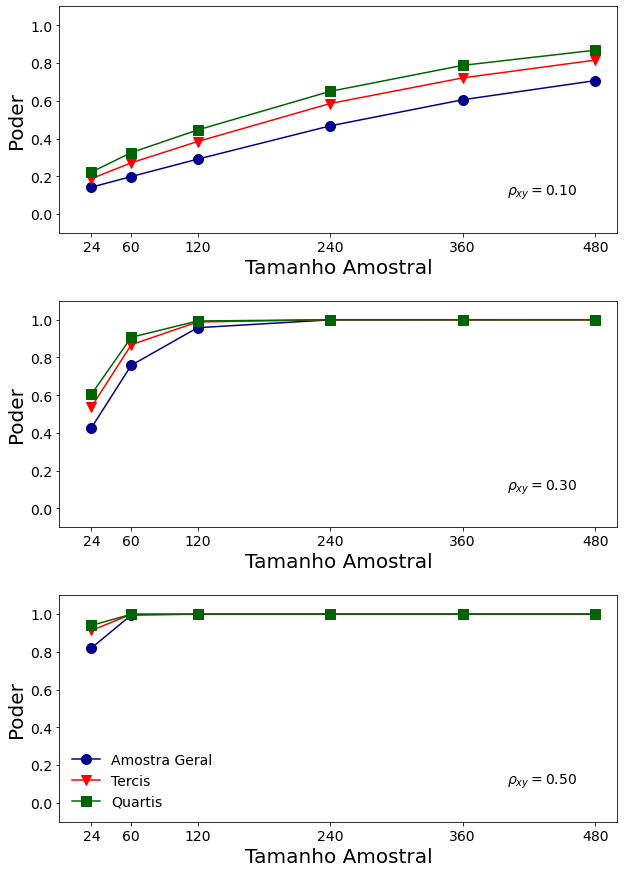

In [35]:
# Tamanho e resolução do gráfico
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 15))

markers = ["o", "v", "s"]
colors = ["darkblue", "red", "darkgreen"]
labels = ["Amostra Geral", "Tercis", "Quartis"]

for i in range(3):
    for j in range(3):
        ax[i].plot(Ns, new_powers[i][j], label = labels[j],
                   marker = markers[j], color = colors[j], markersize = 10)
    ax[i].set_xlim(-5, 500)    
    ax[i].set_ylim(-0.1, 1.1)
    ax[i].set_xticks(ticks = Ns)
    ax[i].tick_params(axis = "both", which = "major", labelsize = 14)
    ax[i].set_xlabel("Tamanho Amostral", fontsize = 20)
    ax[i].set_ylabel("Poder", fontsize = 20)
    ax[i].annotate(text = r"$\rho_{xy} =$" + f"{rhos[i]:.2f}", xy = (400, 0.1), fontsize = 14)
    if i == 2:
        plt.legend(fontsize = 14, frameon = False)
    
plt.subplots_adjust(hspace = 0.3)

plt.savefig('012.3 - Poder estatístico obtido com diferentes Ns, rhos e EGAs.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

Como esperado na figura acima (e replicando Preacher et al., 2015, Figura 2), poder aumentou com N e com rho(x, y). Mais importante, os três paineis indicam que o poder aumenta na medida em que a divisão de grupos extremos é mais extrema (i.e., poder é maior em divisão por quartis, seguida de divisão por tercis, seguida de amostra geral). Desse modo, os resultados apoiam a ideia de que a EGA aumenta o poder estatístico de testes de correlação subsequentes.

3. **Tamanhos de efeito**

A seguir, replicaremos a análise de tamanhos de efeito de Preacher et al. (2015). Nela, avaliaremos correlações de Pearson médias de 1.000 amostras, com diferentes níveis de EGAs. A ideia é avaliar em quanto, comparado com a ausência de EGA, as correlações médias aumentam quando há EGAs.

In [66]:
rhos = np.linspace(0, 1, 51)

# correlações médias das 1.000 correlações para cada cenário de rhô
average_full_rs = list()
average_tertile_rs = list()
average_quartile_rs = list()

for j, rho in enumerate(rhos, 1):
    
    # correlações a serem calculadas para cada 1.000 amostras
    full_rs = list()
    tertile_rs = list()
    quartile_rs = list()
    
    sample = 1
    
    mean = [0, 0]
    cov = [[1, rho],
           [rho, 1]]
    
    # criando amostras
    for i in range(1000):

        # sorteando uma amostra da população geral
        full_sample = np.random.multivariate_normal(mean, cov, size = 100_000)
        full_sample = full_sample.T
        
        # sorteando uma amostra dos outer tercis
        tertile_pop = np.random.multivariate_normal(mean, cov, size = 100_000)
        tertile_sample = tertile_pop[(tertile_pop.T[0] < -0.4399) | (tertile_pop.T[0] > 0.4399)][0:1000]
        tertile_sample = tertile_sample.T
        
        # sorteando uma amostra dos outers quartis
        quartile_pop = np.random.multivariate_normal(mean, cov, size = 100_000)
        quartile_sample = quartile_pop[(quartile_pop.T[0] < -0.6745) | (quartile_pop.T[0] > 0.6745)][0:1000]
        quartile_sample = quartile_sample.T

        # calculando os coeficientes de correlação
        full_rs.append(np.corrcoef(full_sample[0], full_sample[1])[0][1])
        tertile_rs.append(np.corrcoef(tertile_sample[0], tertile_sample[1])[0][1])
        quartile_rs.append(np.corrcoef(quartile_sample[0], quartile_sample[1])[0][1])

    # calculando e salvando os valores médios dos coeficientes de correlação após 1.000 simulações
    average_full_rs.append(np.mean(full_rs))
    average_tertile_rs.append(np.mean(tertile_rs))
    average_quartile_rs.append(np.mean(quartile_rs))

    # imprimindo o ponto atual da iteração do loop mais externo
    # para não deixar o usuário no escuro. :-)
    # no meu computador, este código está levando aproximadamente 2 horas para rodar
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(f"{current_time}: Acabamos de concluir a iteração {j} de 51, com rho = {rho:.3f}! :)")

13:31:01: Acabamos de concluir a iteração 1 de 51, com rho = 0.000! :)
13:33:26: Acabamos de concluir a iteração 2 de 51, com rho = 0.020! :)
13:36:19: Acabamos de concluir a iteração 3 de 51, com rho = 0.040! :)
13:38:47: Acabamos de concluir a iteração 4 de 51, com rho = 0.060! :)
13:41:54: Acabamos de concluir a iteração 5 de 51, com rho = 0.080! :)
13:44:20: Acabamos de concluir a iteração 6 de 51, com rho = 0.100! :)
13:47:17: Acabamos de concluir a iteração 7 de 51, com rho = 0.120! :)
13:49:20: Acabamos de concluir a iteração 8 de 51, com rho = 0.140! :)
13:51:18: Acabamos de concluir a iteração 9 de 51, com rho = 0.160! :)
13:53:11: Acabamos de concluir a iteração 10 de 51, com rho = 0.180! :)
13:55:05: Acabamos de concluir a iteração 11 de 51, com rho = 0.200! :)
13:57:01: Acabamos de concluir a iteração 12 de 51, com rho = 0.220! :)
13:59:01: Acabamos de concluir a iteração 13 de 51, com rho = 0.240! :)
14:01:08: Acabamos de concluir a iteração 14 de 51, com rho = 0.260! :)
1

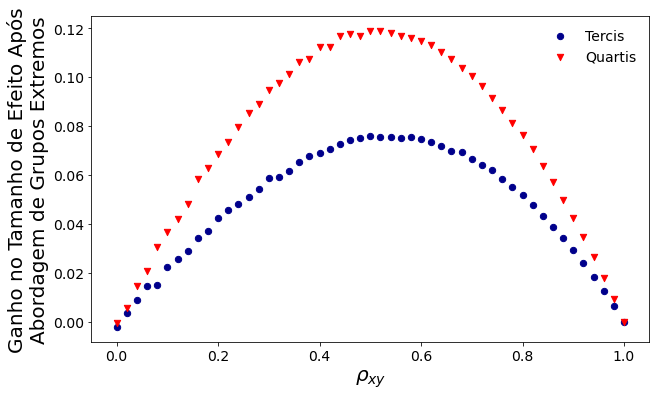

In [67]:
plt.figure(figsize = (10, 6))

plt.scatter(rhos, np.array(average_tertile_rs) - np.array(average_full_rs),
            marker = "o", s = 40, color = "darkblue", label = "Tercis")
plt.scatter(rhos, np.array(average_quartile_rs) - np.array(average_full_rs), 
            marker = "v", s = 40, color = "red", label = "Quartis")
plt.xlabel(r"$\rho_{xy}$", fontsize = 20)
plt.ylabel("Ganho no Tamanho de Efeito Após\nAbordagem de Grupos Extremos", fontsize = 20)

plt.tick_params(axis = "both", which = "major", labelsize = 14)

plt.legend(fontsize = 14, frameon = False)

plt.savefig('012.4 - Ganho no tamanho de efeito após EGA.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

Gráfico acima indica que há um ganho nos tamanhos de efeito, sendo que esses ganhos é maior em valores intermediários de rho(x, y) e menor em valores extremos. Além disso, os ganhos são maiores quanto mais extremo é a EGA (i.e., divisão por quartis leva a uma maior superestimação de tamanho de efeito do que divisão por tercis).

8. **Regressão à média:** a seguir, vamos replicar a demonstração de regressão à média de Preacher et al. (2015). Basicamente, amostraremos duas medidas por indivíduo, ambas referentes a *X* (x1 e x2). A ideia é fazer divisão por quartis e por tercis e avaliar em que medida os participantes são consistentemente agrupados em função dessas divisões e da fidedignidade populacional da variável, rho(x1, x2). Se a medida é confiável, os valores observados deveriam estar contidos no que seria uma diagonal principal (i.e., inferior–inferior, médio–médio e superior–superior). Não é isso o que acontece, infelizmente... Quanto menor é a fidedignidade da medida, maior é o erro de agrupamento do tempo 1 para o tempo 2 (i.e., maior é a regressão à média). Além disso, quanto menos extrema é a EGA, mais erro ocorre (i.e., mais regressão à média).

In [68]:
def regressao_a_media(rho = 1, divisao = "tercis"):
    """
    Cria função que será depois usada para testar os cenários da Tabela 2 de Preacher et al. (2015).
    """

    mean = [0, 0]
    cov = [[1, rho],
          [rho, 1]]

    N = 1_000

    x = np.random.multivariate_normal(mean, cov, size = N)
    np.corrcoef(x.T[0], x.T[1])

    if divisao == "tercis":
    
        tercis_x1 = np.quantile(x.T[0], [0.33, 0.66])
        tercis_x2 = np.quantile(x.T[1], [0.33, 0.66])

        a = np.where(x.T[0] < tercis_x1[0], 1, 0) # tercil inferior = 1
        b = np.where(x.T[0] > tercis_x1[1], 2, 0) # tercil superior = 2
        c = a + b

        d = np.where(x.T[1] < tercis_x2[0], 1, 0) # tercil inferior = 1
        e = np.where(x.T[1] > tercis_x2[1], 2, 0) # tercil superior = 2
        f = d + e

        tercis = ["médio", "inferior", "superior"]

        for i in range(3):
            for j in range(3):
                print(f"Tercil {tercis[i]} no tempo 1 & Tercil {tercis[j]} no tempo 2:", end = " ")
                print(np.count_nonzero((c == i) & (f == j)))
    
    elif divisao == "quartis":
        
        quartis_x1 = np.quantile(x.T[0], [0.25, 0.75])
        quartis_x2 = np.quantile(x.T[1], [0.25, 0.75])

        a = np.where(x.T[0] < quartis_x1[0], 1, 0) # quartil 1 = 1
        b = np.where(x.T[0] > quartis_x1[1], 2, 0) # quartil 4 = 2
        c = a + b

        d = np.where(x.T[1] < quartis_x2[0], 1, 0) # quartil 1 = 1
        e = np.where(x.T[1] > quartis_x2[1], 2, 0) # quartil 4 = 2
        f = d + e

        quartis = ["médio", "inferior", "superior"]

        for i in range(3):
            for j in range(3):
                print(f"Quartil {quartis[i]} no tempo 1 & Quartil {quartis[j]} no tempo 2:", end = " ")
                print(np.count_nonzero((c == i) & (f == j)))


In [71]:
# Testando os 4 cenários da Tabela 2
print("rho = 0.90 e divisão por tercis")
regressao_a_media(rho = 0.9)

print("\nrho = 0.80 e divisão por tercis")
regressao_a_media(rho = 0.8)

print("\nrho = 0.90 e divisão por quartis")
regressao_a_media(rho = 0.9, divisao = "quartis")

print("\nrho = 0.80 e divisão por quartis")
regressao_a_media(rho = 0.8, divisao = "quartis")

rho = 0.90 e divisão por tercis
Tercil médio no tempo 1 & Tercil médio no tempo 2: 195
Tercil médio no tempo 1 & Tercil inferior no tempo 2: 61
Tercil médio no tempo 1 & Tercil superior no tempo 2: 74
Tercil inferior no tempo 1 & Tercil médio no tempo 2: 60
Tercil inferior no tempo 1 & Tercil inferior no tempo 2: 268
Tercil inferior no tempo 1 & Tercil superior no tempo 2: 2
Tercil superior no tempo 1 & Tercil médio no tempo 2: 75
Tercil superior no tempo 1 & Tercil inferior no tempo 2: 1
Tercil superior no tempo 1 & Tercil superior no tempo 2: 264

rho = 0.80 e divisão por tercis
Tercil médio no tempo 1 & Tercil médio no tempo 2: 174
Tercil médio no tempo 1 & Tercil inferior no tempo 2: 75
Tercil médio no tempo 1 & Tercil superior no tempo 2: 81
Tercil inferior no tempo 1 & Tercil médio no tempo 2: 81
Tercil inferior no tempo 1 & Tercil inferior no tempo 2: 241
Tercil inferior no tempo 1 & Tercil superior no tempo 2: 8
Tercil superior no tempo 1 & Tercil médio no tempo 2: 75
Tercil su

Aqui foi quando eu tentei mexer com a parte da fidedignidade, mas falhei miseravelmente. Eu consegui gerar as curvas características dos itens e curvas de informações dos itens, mas não soube como seguir para a curva de informação do teste e para as análises de fidedignidade por regiões. Faltou conhecimento em TRI para eu seguir daqui até o fim... Ajudas são bem-vindas. :)

In [72]:
def TRI1PL(thetas, delta):
    """
    Recebe thetas (e.g., continuum de traços latentes de -3 a +3) e deltas (dificuldades dos itens).
    Retorna lista com probabilidade de endossar corretamente os itens.
    Baseado em modelo de TRI de 1 parâmetro livre. Parâmetro de discriminação é fixado em 1.
    
    de Ayala (2009), Equação 2.8
    """
    alfa = 1
    probs = list()
    for theta in thetas:
        probs.append(1 / (1 + np.exp(-alfa * (theta - delta))))
    
    return probs


def TRI1PL_information(probs):
    """
    Recebe probabilidades de endossar itens.
    Retorna lista com informação do item ao longo do traço latente.
    Baseado em modelo de TRI de 1 parâmetro livre. Parâmetro de discriminação é fixado em 1.
    
    de Ayala (2009), Equação 2.17
    """
    alfa = 1
    infos = list()
    for prob in probs:
        infos.append(alfa ** 2 * prob * (1 - prob))
    
    return infos


# dificuldades
deltas = np.array([-.50, -.50, # 2 itens muito fáceis
               -.25, -.25, # 2 itens fáceis
               0, 0, 0, 0, 0, 0, 0, # 7 itens medianos
              .25, 25, # 2 itens difíceis
              .50, 50]) # 2 itens muito difíceis

# thetas
thetas = np.linspace(-3, 3, 200)   

# calculando probabilidade de endossar diferentes itens
# bem como a informação de cada item ao longo do traço latente
probabilidades = list()
informacoes = list()

for i, delta in enumerate(deltas):
    probabilidades.append(TRI1PL(thetas, delta))
    informacoes.append(TRI1PL_information(probabilidades[i]))    

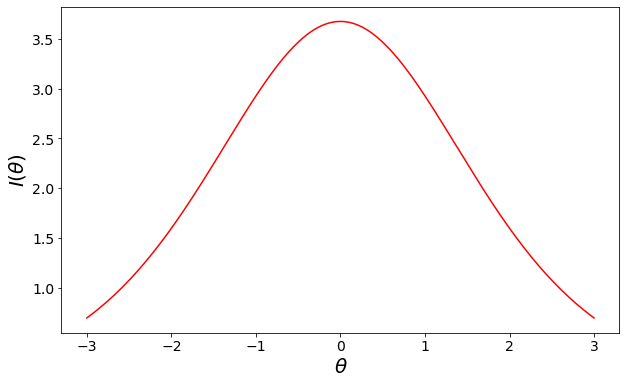

In [73]:
informacoes = np.array(informacoes)

total_information = np.zeros(len(thetas))

# devo ter cometido um erro mais ou menos aqui, na hora de somar a informação de todos os itens
# para compor a informação do teste em geral
for i in informacoes:
    total_information += i

    
plt.figure(figsize = (10, 6))   

plt.plot(thetas, information, color = "red")

plt.xlabel(r"$\theta$", fontsize = 20)
plt.ylabel(r"$I(\theta)$", fontsize = 20)

plt.tick_params(axis = "both", which = "major", labelsize = 14)

plt.savefig('012.5 - Curva de informação do teste.jpg', dpi = 600, bbox_inches = "tight")

plt.show()